In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import make_scorer

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn import ensemble, model_selection

from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import  XGBClassifier

In [3]:
pd.read_csv('C:\\Users\\lopez\\OneDrive\\Escritorio\\BOOTCAMP_DS\\ALUMNO\\3-Machine_Learning\\Entregas\\entrega ML\\churn\\ENTREGABLE\\Data\\Data_raw\\Churn_Modelling.csv').head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


##### Con este dataset se pretende predecir los clientes que van a abandonar el banco.

- **RowNumber**: Índice.
- **CustomerId:** Código único de cliente.
- **Surname:** Apellido del clinete.
- **CreditScore:** Mide la facilidad de obtener un credito.
- **Geography:** País de residencia.
- **Gender:** Género.
- **Age:** Edad
- **Tenure:** Tiempo que lleva el clinte perteneciendo al banco.
- **Balance:** Cantidad de dinero que tiene el cliente en el banco depositado.
- **NumOfProducts:** Número de productos que tiene un cliente asociados al banco.
- **HasCrCard:** Si tiene tarjeta de credito o no (1= tiene trajeta de credito)
- **IsActiveMember:** Cliente activo o no.
- **EstimatedSalary:** Salario del cliente.
- **Exited:** Será el target del modelo. Si ha cancelado sus cuentas en el banco o no, (abandono = 1).

##### Para poder comporbar de forma correcta el funcionamiento de los modelos voy a dividir el dataset en dos, de tal forma que train sera el dataset de entrenamiento y constara de 7.000 registros, y test constara de los 3.000 restantes.

In [8]:
churn = pd.read_csv('C:\\Users\\lopez\\OneDrive\\Escritorio\\BOOTCAMP_DS\\ALUMNO\\3-Machine_Learning\\Entregas\\entrega ML\\churn\\ENTREGABLE\\Data\\Data_raw\\train.csv')

In [9]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        7000 non-null   int64  
 1   CustomerId       7000 non-null   int64  
 2   Surname          7000 non-null   object 
 3   CreditScore      7000 non-null   int64  
 4   Geography        7000 non-null   object 
 5   Gender           7000 non-null   object 
 6   Age              7000 non-null   int64  
 7   Tenure           7000 non-null   int64  
 8   Balance          7000 non-null   float64
 9   NumOfProducts    7000 non-null   int64  
 10  HasCrCard        7000 non-null   int64  
 11  IsActiveMember   7000 non-null   int64  
 12  EstimatedSalary  7000 non-null   float64
 13  Exited           7000 non-null   int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 765.8+ KB


##### El dataset  se train consta del 8.000 registros de clientes. Tenemos variables numéricas y no numéricas con las que habrá que trabajar. No hay valores nulos. También tenemos variables categoricas (Surname, Geography, Gender, Tenure, NumOfProducts, HasCrCard, IsActiveMember, Exited) y continuas (Age, CreditScore, Balance, EstimatedSalary).

In [65]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,7000.000000,7.000000e+03,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,3500.500000,1.569070e+07,649.787000,38.892714,5.010286,76471.883751,1.526000,0.703286,0.512143,100631.400446,0.206143
std,2020.870275,7.157830e+04,97.046279,10.465562,2.887500,62403.383911,0.583047,0.456842,0.499888,57599.463109,0.404563
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,1750.750000,1.562860e+07,582.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51113.055000,0.000000
50%,3500.500000,1.569068e+07,651.000000,37.000000,5.000000,97277.130000,1.000000,1.000000,1.000000,100890.865000,0.000000
75%,5250.250000,1.575183e+07,717.000000,44.000000,7.250000,127537.155000,2.000000,1.000000,1.000000,149587.657500,0.000000
max,7000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


- Las edades van de 18 a 92 años, siendo la media de edad 40 años. y estando la mayoria de las edades agrupadas en torno a los 37 años.
- En 'Tenure' podemos observar que hay clientes nuevos que equivalen a 0, hasta clientes que llevan 10 años en el banco.
- Credit Score mide la viabilidad de concecer un crédito, siendo 350 muy mala y 850 muy buena.
- En balance hay cuentas que tienen 0 hasta 250k. 
- Credit card es una variable categórica en la que 0 significa que no cuentan con tarjeta de credito.
- La media de miembros activos e inactivos es del 50%.

#### EXPLORACIÓN DE DATOS

In [66]:
#sns.pairplot(churn , hue = 'Exited')

- Las edades intermedias son las que mas cancelan.
- Clientes con tres y cuatro productos cancelan mucho más en porporcion a los que tienen uno o dos.

Figure(288x288)


,Exited
0,5557
1,1443


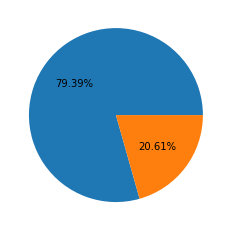

In [67]:
plt.figure(figsize=(4,4))
plt.pie(churn['Exited'].value_counts(),
        autopct='%1.2f%%')
print (plt.gcf())

pd.DataFrame(churn.Exited.value_counts())


- La variable target está desvalanceada. El 20% han cancelado sus productos con el banco mientras que el 80% se mantiene como cliente.

##### Análisis univariante separando por la variable target para ver como se comportan las variables.

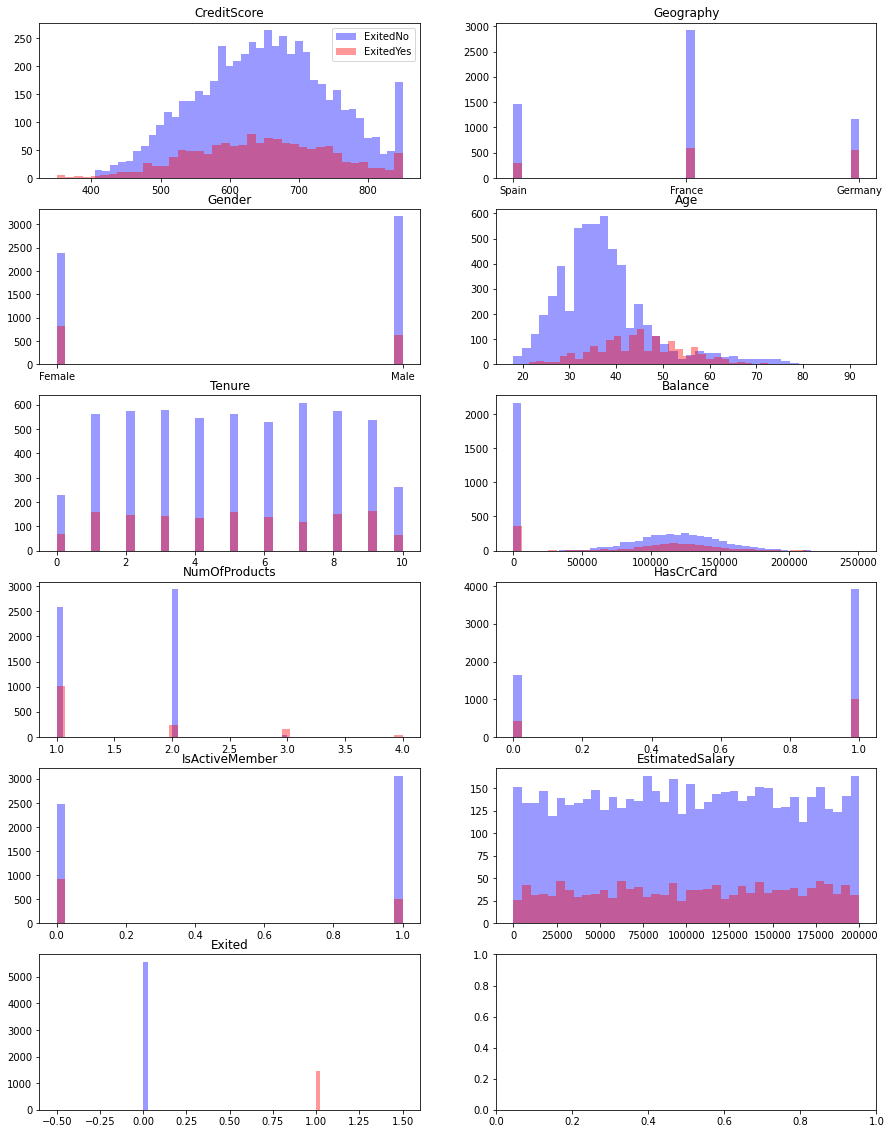

In [68]:
churn2 = pd.read_csv('Data/Data_raw/train.csv')
churn2 = churn2.drop(['RowNumber','CustomerId','Surname'], axis=1)  
'''
Dataset sin transformar las variables para una mejor visualizacion.
'''

fig, axes = plt.subplots(6,2, figsize=(15,20))
ExitedNo = churn2[churn2['Exited']==0]
ExitedYes = churn2[churn2['Exited']==1]

axes = axes.ravel()
for i in range(len(churn2.columns)):
    axes[i].hist(ExitedNo.values[:,i], bins = 40, color='b',alpha=0.4)
    axes[i].hist(ExitedYes.values[:,i],bins = 40, color='r',alpha=0.4)
    axes[i].set_title(churn2.columns[i])

axes[0].legend(['ExitedNo','ExitedYes']);     

#### DATA ENGENIERING

- Lo primero que voy a hacer es ordenar y modificar las variables para poder hacer un análisis explorartiorio.
- Las columnas RowNumber, CustomerId y Surname no tienen ningún uso para el modelo así que las elimino.
- Otorgo valor numérico a las variables 'Geography' y 'Gender' para ver si mantienen correlación con la variable target.
- Para intentar mejorar las correlaciones voy a agrupar todos los datos con comportamientos similares. 
- El caso de CreditScore mide la facilidad de obtener un credito en base a la solvencia, ingresos y otras variables. Las clasifico de peor a mejor segun el scoring que determina la banca.
- Agrupo el número de productos. Con 1 y 2 productos asigno valor 0 y con 3 y 4 el valor 1. Esto lo hago porque hay diferencia significativa en cancelaciones de los que tienen 1 y 2 vs contra los de 3 y 4.

In [69]:
def transforming_df (data):
    
    data['Geography'] = data['Geography'].replace({'France': 0, 'Spain': 1, 'Germany': 2})
    data['Gender'] = data ['Gender'].replace({'Female': 0, 'Male': 1})

    data['CreditScore'] = np.where((data['CreditScore'] >=350) & (data['CreditScore'] <=580), 0, data['CreditScore'])
    data['CreditScore'] = np.where((data['CreditScore'] >580) & (data['CreditScore'] <=670), 1, data['CreditScore'])
    data['CreditScore'] = np.where((data['CreditScore'] >670) & (data['CreditScore'] <=740), 2, data['CreditScore'])
    data['CreditScore'] = np.where((data['CreditScore'] >740) & (data['CreditScore'] <=800), 3, data['CreditScore'])
    data['CreditScore'] = np.where((data['CreditScore'] >800) & (data['CreditScore'] <=850), 4, data['CreditScore'])

    data['NumOfProducts'] = data['NumOfProducts'].replace({1: 0, 2: 0, 3: 1, 4 :1})

    data.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace = True)
    
    return data.head()

In [70]:
transforming_df(churn)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,0,0,42,2,0.00,0,1,1,101348.88,1
1,1,1,0,41,1,83807.86,0,0,1,112542.58,0
2,0,0,0,42,8,159660.80,1,1,0,113931.57,1
3,2,0,0,39,1,0.00,0,0,0,93826.63,0
4,4,1,0,43,2,125510.82,0,1,1,79084.10,0


<AxesSubplot:>

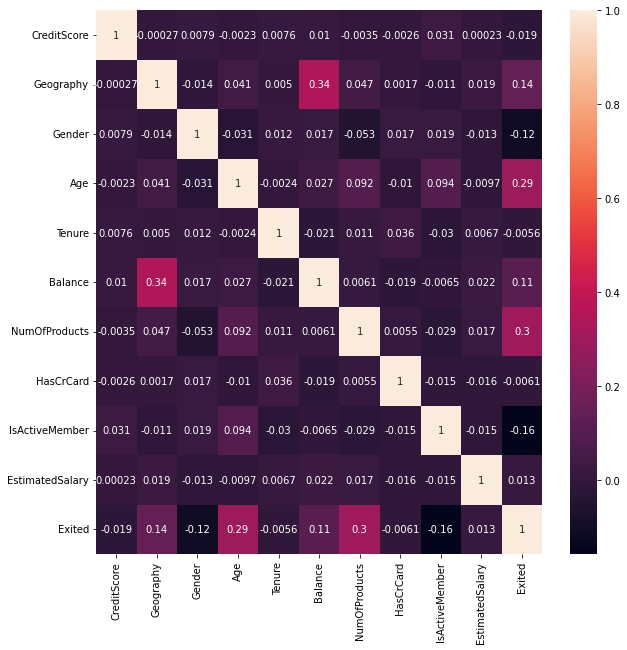

In [71]:
#Visualizamos la matriz de correlacion para ver como afectan las variables al target. 

plt.figure(figsize=(10,10))
sns.heatmap(churn.corr(), annot = True)


#### DATA PROCESING

In [72]:
#Sepramos los datos en train y test para poder hacer una valoración rápida de cuáles son los mejores modelos y más adelante hacer la prueba final con el datset test.
X = churn.drop(['Exited'],1)
y = churn['Exited']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

C:\Users\lopez\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Cómo el target es desbalanceado uso SMOTE para equiparar el número de unos y ceros y así poder entrenar con un modelo que balancee el target.

Que se cuelen ceros como uno no me preocupa porque no tiene impacto negativo en mi negocio, pero que se cuelen unos como ceros(17) me preocupa mas porque son clinetes que no puedo predecir que cayan a cancelar las cuentas.

#### SMOTE

In [73]:
smoting = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors= 10)
X_train, y_train = smoting.fit_resample(X_train, y_train)

'''
Hace SMOOTING solo en la variable de entrenamiento no en el test, ya que duplicar datos en test para valancear nos 
alejaria del problema real.
'''

y_train.value_counts()

0    4456
1    4456
Name: Exited, dtype: int64

##### ESCALADO DE DATOS

In [74]:
from sklearn.preprocessing import StandardScaler
X_train_scaled = StandardScaler().fit_transform(X_train.values)
X_test_scaled = StandardScaler().fit_transform(X_test.values)

#### ELECCIÓN DE MÉTRICAS

- Accuracy : Mide solo los correctos. al estar desvalanceado no nos sirve.
- Recall : mide la tasa de true Positive. Es decir se centra en los unos y te da el porcentaje clasificado correctamente como unos frente a los unos clasificados como ceros.
- Precision : numero indentificado correctamente como uno del total de elementos identificados como uno. True positive(unos que predice cómo unos) entre los false positive (ceros que predice como uno). Si premio la precision fallara menos ceros como unos pero bajaran los unos que clasifica correctamente.
- Quiero un recall alto porque necesito hacer enfasis en los unos y que se me escapen pocos, pero intentando siempre mantener una precision balanceada. 

#### TESTING AND TRAINING MODELS

#### REGRESION

In [75]:
lmr = linear_model.LogisticRegression()

lmr.fit(X_train_scaled, y_train)

lmr_pred = lmr.predict(X_test_scaled)

print('ROC score : ' , roc_auc_score(y_test,lmr_pred))
print('F1 score : ' , f1_score(y_test,lmr_pred))
print('-'*35)
print('Recall score : ' , recall_score(y_test,lmr_pred))
print('Precision score : ' , accuracy_score(y_test,lmr_pred))
lrm_matrix = confusion_matrix(lmr_pred,y_test)
lrm_matrix

ROC score :  0.6887399414943546
F1 score :  0.47875647668393795
-----------------------------------
Recall score :  0.7725752508361204
Precision score :  0.6407142857142857


array([[666,  68],
       [435, 231]], dtype=int64)

<AxesSubplot:>

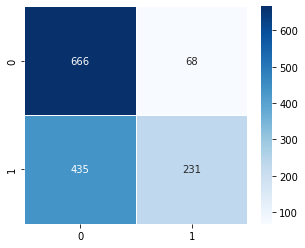

In [76]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(lmr_pred,y_test), annot = True, linewidths=.5, fmt='g', cmap='Blues')

#### DECISION TREE CLASSIFIER

In [77]:
dtc = DecisionTreeClassifier()

params = {'max_depth': list(range(1,20)),         
         'min_samples_leaf' : range(1,20), 
         }

gs_dtc = GridSearchCV(dtc, params, scoring='recall')

gs_dtc.fit(X_train_scaled,y_train)

gs_dtc_pred = gs_dtc.predict(X_test_scaled)

print('ROC score : ' , roc_auc_score(y_test,gs_dtc_pred))
print('F1 score : ' , f1_score(y_test,gs_dtc_pred))
print('-'*35)
print('Recall score : ' , recall_score(y_test,gs_dtc_pred))
print('Precision score : ' , accuracy_score(y_test,gs_dtc_pred))
dtc_matrix = confusion_matrix(gs_dtc_pred,y_test)
dtc_matrix


ROC score :  0.6673957089784599
F1 score :  0.4565217391304348
-----------------------------------
Recall score :  0.7725752508361204
Precision score :  0.6071428571428571


array([[619,  68],
       [482, 231]], dtype=int64)

#### KNN / PIPELINE / GRIDSEARCHCV

In [156]:
KNN = KNeighborsClassifier()

params = {'n_neighbors': list(range(1,25))  
         }   

gs_KNN = GridSearchCV(KNN, params, scoring='recall')

gs_KNN.fit(X_train_scaled,y_train)

KNN_pred = gs_KNN.predict(X_test_scaled)

print('ROC score : ' , roc_auc_score(y_test,KNN_pred))
print('F1 score : ' , f1_score(y_test,KNN_pred))
print('-'*35)
print('Recall score : ' , recall_score(y_test,KNN_pred))
print('Precision score : ' , accuracy_score(y_test,KNN_pred))
KNN_matrix = confusion_matrix(KNN_pred,y_test)
KNN_matrix

ROC score :  0.6884847766852269
F1 score :  0.4893350062735258
-----------------------------------
Recall score :  0.6521739130434783
Precision score :  0.7092857142857143


array([[798, 104],
       [303, 195]], dtype=int64)

#### SVM

- Polinómica

In [157]:
svm = SVC(kernel='poly')

params = {'degree':list(range(10,20))
                }

svm_gtc = GridSearchCV(svm, params, scoring='recall')         

svm_gtc.fit(X_train_scaled,y_train)
svm_pred = svm_gtc.predict(X_test_scaled)

print('ROC score : ' , roc_auc_score(y_test,svm_pred))
print('F1 score : ' , f1_score(y_test,svm_pred))
print('-'*35)
print('Recall score : ' , recall_score(y_test,svm_pred))
print('Precision score : ' , accuracy_score(y_test,svm_pred))
svm_matrix = confusion_matrix(svm_pred,y_test)
svm_matrix


ROC score :  0.5474333154110432
F1 score :  0.37279267495094837
-----------------------------------
Recall score :  0.9531772575250836
Precision score :  0.315


array([[156,  14],
       [945, 285]], dtype=int64)

In [158]:
svm_gtc.best_params_

{'degree': 19}

In [78]:
svm = SVC(kernel='poly', degree =3)

svm.fit(X_train_scaled,y_train)
svm_pred = svm.predict(X_test_scaled)

print('ROC score : ' , roc_auc_score(y_test,svm_pred))
print('F1 score : ' , f1_score(y_test,svm_pred))
print('-'*35)
print('Recall score : ' , recall_score(y_test,svm_pred))
print('Precision score : ' , accuracy_score(y_test,svm_pred))
svm_matrix = confusion_matrix(svm_pred,y_test)
svm_matrix

ROC score :  0.7012096027023169
F1 score :  0.4902564102564102
-----------------------------------
Recall score :  0.7993311036789298
Precision score :  0.645


array([[664,  60],
       [437, 239]], dtype=int64)

- SVC Linear

In [160]:
svm_l = SVC(kernel='linear')

svm_l.fit(X_train_scaled,y_train)
svml_pred = svm_l.predict(X_test_scaled)

print('ROC score : ' , roc_auc_score(y_test,svml_pred))
print('F1 score : ' , f1_score(y_test,svml_pred))
print('-'*35)
print('Recall score : ' , recall_score(y_test,svml_pred))
print('Precision score : ' , accuracy_score(y_test,svml_pred))
svc_matrix = confusion_matrix(svml_pred,y_test)
svc_matrix

ROC score :  0.687356279940097
F1 score :  0.47798742138364775
-----------------------------------
Recall score :  0.7625418060200669
Precision score :  0.6442857142857142


array([[674,  71],
       [427, 228]], dtype=int64)

- LinearSVC

In [161]:
svm_lin = Pipeline([("linear_svc", LinearSVC(C = 160, loss='hinge', random_state=42))
])

svm_lin.fit(X_train_scaled, y_train)
svm__lin_pred = svm_lin.predict(X_test_scaled)

print('ROC score : ' , roc_auc_score(y_test,svm__lin_pred))
print('F1 score : ' , f1_score(y_test,svm__lin_pred))
print('-'*35)
print('Recall score : ' , recall_score(y_test,svm__lin_pred))
print('Precision score : ' , accuracy_score(y_test,svm__lin_pred))
svm_lin_matrix = confusion_matrix(svm__lin_pred,y_test)
svm_lin_matrix

ROC score :  0.634617662872609
F1 score :  0.4261715296198055
-----------------------------------
Recall score :  0.8060200668896321
Precision score :  0.5364285714285715


C:\Users\lopez\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


array([[510,  58],
       [591, 241]], dtype=int64)

#### RANDOM FOREST CLASSIFIER

In [162]:
RFC = ensemble.RandomForestClassifier()

parameters = {
    'max_depth':list(range(1,20))
    }

rfc = model_selection.RandomizedSearchCV(estimator = RFC, 
                  param_distributions= parameters,
                  scoring=make_scorer(roc_auc_score, greater_is_better=True,
                  needs_threshold=True),
                  n_iter=10)


rfc.fit(X_train_scaled, y_train)
rfc_pred = rfc.predict(X_test_scaled)

print('ROC score : ' , roc_auc_score(y_test,rfc_pred))
print('F1 score : ' , f1_score(y_test,rfc_pred))
print('-'*35)
print('Recall score : ' , recall_score(y_test,rfc_pred))
print('Precision score : ' , accuracy_score(y_test,rfc_pred))
rfc_matrix = confusion_matrix(rfc_pred,y_test)
rfc_matrix

ROC score :  0.6947788419770412
F1 score :  0.5020242914979757
-----------------------------------
Recall score :  0.6220735785953178
Precision score :  0.7364285714285714


array([[845, 113],
       [256, 186]], dtype=int64)

#### XGB CLASSIFIER

In [29]:
xgb = XGBClassifier(random_state=42, n_estimators = 200)

xgb.fit(X_train_scaled, y_train)
best_xgb_clf_pred = xgb.predict(X_test_scaled)

print('ROC score : ' , roc_auc_score(y_test,best_xgb_clf_pred))
print('Precision score : ' , precision_score(y_test,best_xgb_clf_pred))
print('Recall score : ' , recall_score(y_test,best_xgb_clf_pred))
print('F1 score : ' , f1_score(y_test,best_xgb_clf_pred))
xgb_matrix = confusion_matrix(best_xgb_clf_pred,y_test)
xgb_matrix

C:\Users\lopez\AppData\Local\Programs\Python\Python37\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:18:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
ROC score :  0.6902800433780176
Precision score :  0.4
Recall score :  0.6421404682274248
F1 score :  0.4929396662387677


array([[813, 107],
       [288, 192]], dtype=int64)

#### GRADIENT BOOST CLASSIFIER

In [164]:
gbc = GradientBoostingClassifier(n_estimators = 200, random_state=42)

gbc.fit(X_train_scaled, y_train)

y_pred_gbc = gbc.predict(X_test_scaled)

print('ROC score : ' , roc_auc_score(y_test,y_pred_gbc))
print('Precision score : ' , precision_score(y_test,y_pred_gbc))
print('Recall score : ' , recall_score(y_test,y_pred_gbc))
print('F1 score : ' , f1_score(y_test,y_pred_gbc))
gbc_matrix = confusion_matrix(y_pred_gbc,y_test)
gbc_matrix

ROC score :  0.7085941937855218
Precision score :  0.395910780669145
Recall score :  0.7123745819397993
F1 score :  0.5089605734767025


array([[776,  86],
       [325, 213]], dtype=int64)

#### PRUEBA FINAL
- Comprobamos el desempeño del modelo con un datset final de 3000 registros para ver como predice.

In [10]:
test = pd.read_csv('C:\\Users\\lopez\\OneDrive\\Escritorio\\BOOTCAMP_DS\\ALUMNO\\3-Machine_Learning\\Entregas\\entrega ML\\churn\\ENTREGABLE\\Data\\Data_raw\\test.csv')

transforming_df(test)


X = test.drop(['Exited'],1)
y = test['Exited']
X_scaled = StandardScaler().fit_transform(X.values)
pd.DataFrame(y.value_counts())

NameError: name 'transforming_df' is not defined

In [80]:
svm.predict(X_scaled)
print (confusion_matrix(svm.predict(X_scaled),y))

[[1409  124]
 [ 997  470]]


- Viendo la situacion del banco, la mayoria de clientes que pierden son clientes antiguos con varios porductos y con actividad bancaria por lo que dejan el banco por falta de un buen servicio. por ello se podria considerar que el mejor modelo es el que mneos unos deje sin detectar aunq se cuelen muchos falsos negativos.